In [59]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/air-quality-data-in-india/stations.csv
/kaggle/input/air-quality-data-in-india/station_hour.csv
/kaggle/input/air-quality-data-in-india/city_day.csv
/kaggle/input/air-quality-data-in-india/city_hour.csv
/kaggle/input/air-quality-data-in-india/station_day.csv


In [60]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings('ignore')

#importing day-wise data of cities
df= pd.read_csv('../input/air-quality-data-in-india/city_day.csv')

df['Date'] = pd.to_datetime(df['Date'])

#visualizing the top rows of the dataset
df.tail(5)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory
29530,Visakhapatnam,2020-07-01,15.00,66.00,0.40,26.85,14.05,5.20,0.59,2.10,17.05,NaN,NaN,NaN,50.0,Good


In [61]:
cities_all = df.pivot_table(values='AQI', index=['Date'], columns='City')
cities_all=cities_all.add_suffix('_AQI')
cities=cities_all.resample(rule='MS').mean()
cities.head()

City,Ahmedabad_AQI,Aizawl_AQI,Amaravati_AQI,Amritsar_AQI,Bengaluru_AQI,Bhopal_AQI,Brajrajnagar_AQI,Chandigarh_AQI,Chennai_AQI,Coimbatore_AQI,...,Jorapokhar_AQI,Kochi_AQI,Kolkata_AQI,Lucknow_AQI,Mumbai_AQI,Patna_AQI,Shillong_AQI,Talcher_AQI,Thiruvananthapuram_AQI,Visakhapatnam_AQI
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,350.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-02-01,520.640000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-01,418.571429,NaN,NaN,NaN,130.545455,NaN,NaN,NaN,363.800000,NaN,...,NaN,NaN,NaN,264.272727,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-01,308.640000,NaN,NaN,NaN,113.733333,NaN,NaN,NaN,175.862069,NaN,...,NaN,NaN,NaN,118.586207,NaN,NaN,NaN,NaN,NaN,NaN
2015-05-01,263.466667,NaN,NaN,NaN,102.774194,NaN,NaN,NaN,176.129032,NaN,...,NaN,NaN,NaN,137.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
cities['India_AQI']=cities.mean(axis=1)
cities.head()

City,Ahmedabad_AQI,Aizawl_AQI,Amaravati_AQI,Amritsar_AQI,Bengaluru_AQI,Bhopal_AQI,Brajrajnagar_AQI,Chandigarh_AQI,Chennai_AQI,Coimbatore_AQI,...,Kochi_AQI,Kolkata_AQI,Lucknow_AQI,Mumbai_AQI,Patna_AQI,Shillong_AQI,Talcher_AQI,Thiruvananthapuram_AQI,Visakhapatnam_AQI,India_AQI
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,350.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,346.311828
2015-02-01,520.640000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,424.284286
2015-03-01,418.571429,NaN,NaN,NaN,130.545455,NaN,NaN,NaN,363.800000,NaN,...,NaN,NaN,264.272727,NaN,NaN,NaN,NaN,NaN,NaN,258.875688
2015-04-01,308.640000,NaN,NaN,NaN,113.733333,NaN,NaN,NaN,175.862069,NaN,...,NaN,NaN,118.586207,NaN,NaN,NaN,NaN,NaN,NaN,193.815995
2015-05-01,263.466667,NaN,NaN,NaN,102.774194,NaN,NaN,NaN,176.129032,NaN,...,NaN,NaN,137.000000,NaN,NaN,NaN,NaN,NaN,NaN,193.556272


<AxesSubplot:xlabel='Date'>

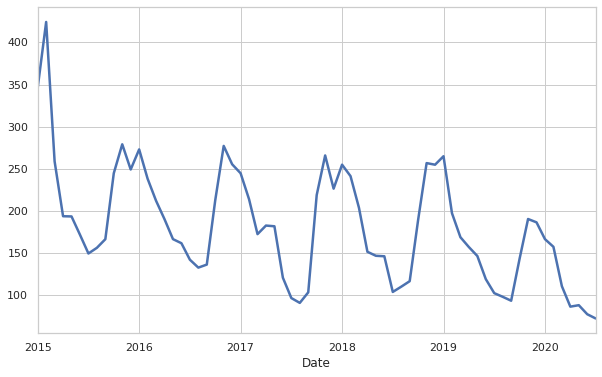

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

cities.reset_index()

sns.set_theme(style='whitegrid')

cities['India_AQI'].plot(kind='line',grid=True,figsize=(10, 6), linewidth=2.5)

From the plot above, we can visually see that there is a slight downward trend and a seasonality present. However, we will decompose the plot into trend, seasonality and residuals to get a clearer picture.

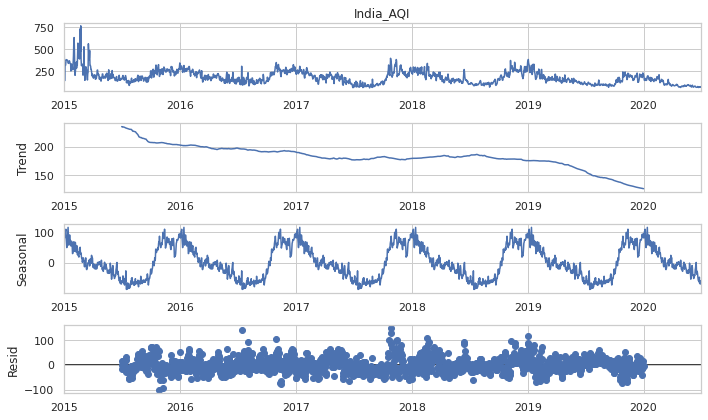

In [64]:
plt.rcParams['figure.figsize'] = (10, 6);
cities_all['India_AQI']=cities_all.mean(axis=1)
fig = seasonal_decompose(cities_all['India_AQI'], model='additive', freq=365).plot()

We can see a clear seasonality and trend present here. The AQI decreases towards mid-year before rising again.

### Augmented Dicky Fuller Test:


In [65]:
dftest = adfuller(cities_all['India_AQI'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
dfoutput

Test Statistic                   -2.949239
p-value                           0.039914
#Lags Used                       23.000000
Number of Observations Used    1985.000000
Critical Value (1%)              -3.433649
Critical Value (5%)              -2.862997
Critical Value (10%)             -2.567546
dtype: float64

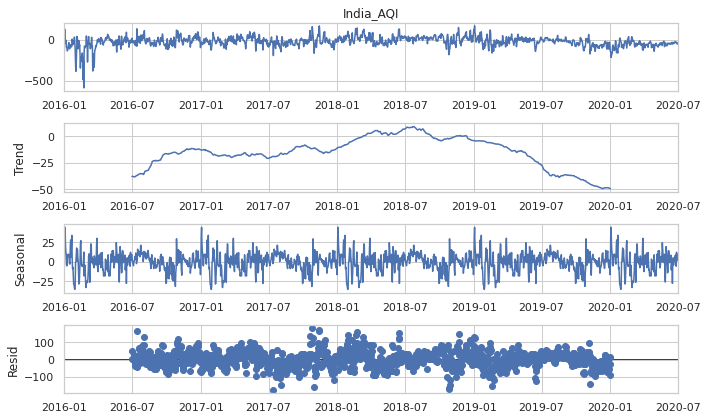

In [66]:
diff = cities_all['India_AQI'].diff(periods=365)
diff.dropna(inplace=True)
fig = seasonal_decompose(diff, model='additive', freq=365).plot()

In [67]:
dftest = adfuller(diff)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
dfoutput

Test Statistic                   -4.215678
p-value                           0.000620
#Lags Used                       23.000000
Number of Observations Used    1620.000000
Critical Value (1%)              -3.434393
Critical Value (5%)              -2.863326
Critical Value (10%)             -2.567721
dtype: float64

From the p-value and the Test Statistic, we can conclude that with one differencing, the time series becomes stationary. Therefore, d=1.

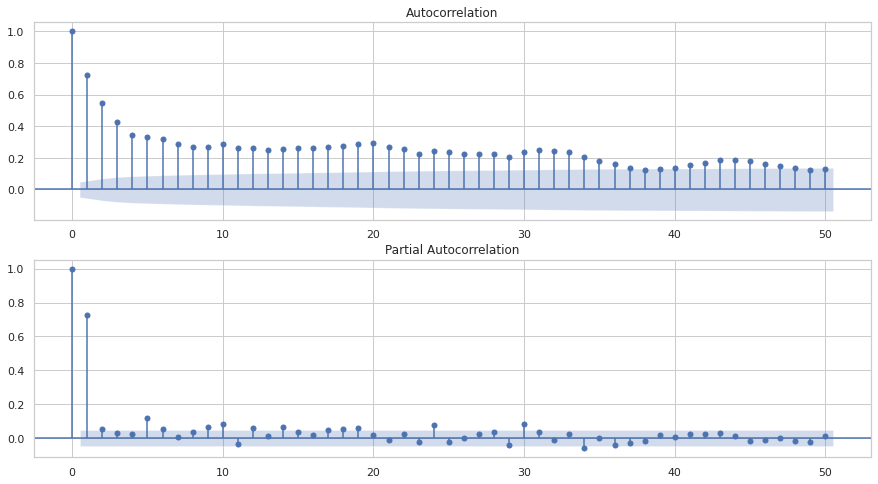

In [68]:
fig, ax = plt.subplots(2,figsize=(15, 8))
ax[0] = plot_acf(diff, lags=50, ax=ax[0])
ax[1] = plot_pacf(diff, lags=50, ax=ax[1])

In [69]:
!pip install pmdarima;
from pmdarima import auto_arima;  

In [70]:
auto_arima(y=cities['India_AQI'],start_p=0,start_P=0,start_q=0,start_Q=0,seasonal=True,m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                   67
Model:             SARIMAX(0, 1, 2)x(1, 0, [1], 12)   Log Likelihood                -316.908
Date:                              Sat, 17 Jul 2021   AIC                            643.816
Time:                                      13:04:18   BIC                            654.765
Sample:                                           0   HQIC                           648.143
                                               - 67                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0189      0.059      0.320      0.749      -0.097       0.135
ma.L2         -0.8363      0.069    -12.077      0.000      -0.972      -0.701
ar.S.L12       0.9444      0.062     15.221      0.000       0.823       1.066
ma.S.L12      -0.5623      0.229     -2.458      0.014      -1.011      -0.114
sigma2       694.3698    142.982      4.856      0.000     414.130     974.610
===================================================================================
Ljung-Box (L1) (Q):                   0.95   Jarque-Bera (JB):                 2.99
Prob(Q):                              0.33   Prob(JB):                         0.22
Heteroskedasticity (H):               0.38   Skew:                            -0.52
Prob(H) (two-sided):                  0.03   Kurtosis:                         2.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [132]:
#dividing into train and test:
train_data=cities_all['India_AQI']
#test_data=cities_all['India_AQI']['2019-03-01':'2020-01-01']

#Building the model:
model=SARIMAX(train_data,order=(0,1,2),seasonal_order=(1,0,1,12))
results=model.fit()
results.summary()
#test_data
cities['India_AQI'][:69]

Date
2015-01-01    346.311828
2015-02-01    424.284286
2015-03-01    258.875688
2015-04-01    193.815995
2015-05-01    193.556272
                 ...    
2020-03-01    110.777963
2020-04-01     86.532043
2020-05-01     88.262751
2020-06-01     77.532108
2020-07-01     72.500000
Freq: MS, Name: India_AQI, Length: 67, dtype: float64

<AxesSubplot:xlabel='Date'>

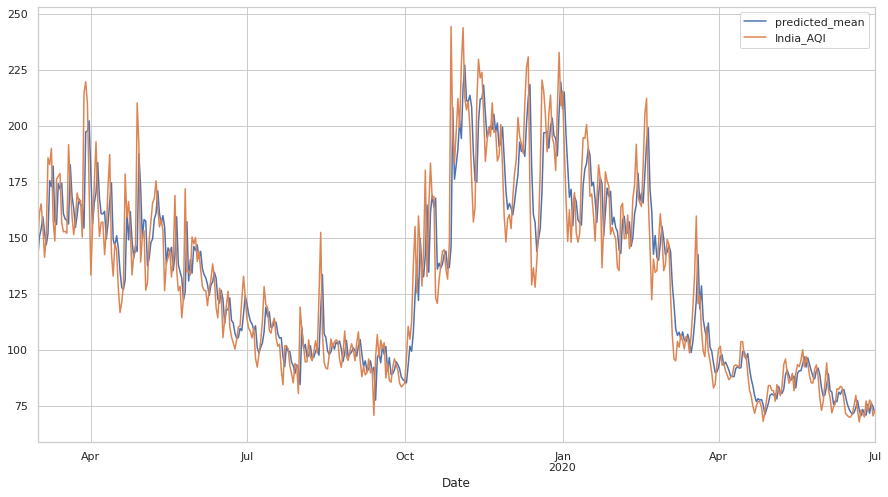

In [135]:
fig, ax= plt.subplots(figsize=(15,8))

predictions = results.predict(start='2019-03-01', end='2020-07-01')
predictions.plot(legend=True, ax=ax)
train_data['2019-03-01':'2020-07-01'].plot(legend=True, ax=ax)